In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import requests
import json
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\DAVID\AppData\Local\Temp/ipykernel_55656/2038594722.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  beer_df.fillna(beer_df.mean(), inplace=True)


1    9
3    8
2    6
0    2
Name: Cluster, dtype: int64


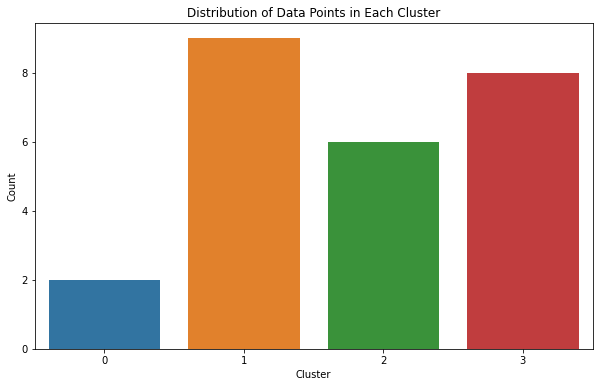


Cluster 1:


,name,abv,ph
16,AB:06,11.2,4.479167
21,Devine Rebel (w/ Mikkeller),12.5,4.400000



Cluster 2:


,name,abv,ph
0,Buzz,4.5,4.4
3,Pilsen Lager,6.3,4.4
4,Avery Brown Dredge,7.2,4.4
9,Bramling X,7.5,4.4
11,Arcade Nation,5.3,4.2
15,Libertine Porter,6.1,4.4
17,Russian Doll – India Pale Ale,6.0,5.2
18,Hello My Name Is Mette-Marit,8.2,4.4
22,Storm,8.0,4.4



Cluster 3:


,name,abv,ph
6,AB:12,11.20,5.3
8,AB:07,12.50,5.6
10,Misspent Youth,7.30,4.4
14,Mixtape 8,14.50,4.4
19,Rabiator,10.27,4.4
23,The End Of History,55.00,4.4



Cluster 4:


,name,abv,ph
1,Trashy Blonde,4.1,4.4
2,Berliner Weisse With Yuzu - B-Sides,4.2,3.2
5,Electric India,5.2,4.4
7,Fake Lager,4.7,4.4
12,Movember,4.5,5.2
13,Alpha Dog,4.5,4.4
20,Vice Bier,4.3,4.0
24,Bad Pixie,4.7,4.4


In [3]:
def get_and_prepare_beer_data(api_url):
    response = requests.get(api_url + "beers")
    beer_json = response.json()
    beer_df = pd.DataFrame(beer_json)

    # Handling missing values
    beer_df.fillna(beer_df.mean(), inplace=True)

    # Handling infinite values
    beer_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    beer_df.dropna(inplace=True)

    return beer_df

def perform_kmeans_clustering(data, num_clusters):
    clustering_features = data[['abv', 'ibu', 'ph', 'attenuation_level', 'target_og']]
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    data['Cluster'] = kmeans_model.fit_predict(clustering_features)
    return data

def analyze_clusters(data, num_clusters):
    print(data['Cluster'].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', data=data)
    plt.title('Distribution of Data Points in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.show()

    for cluster_index in range(num_clusters):
        cluster_data = data[data['Cluster'] == cluster_index][['name', 'abv', 'ph']]
        print("\nCluster {}:".format(cluster_index + 1))
        display(cluster_data)

# Main execution
api_prefix = "https://api.punkapi.com/v2/"
beer_data = get_and_prepare_beer_data(api_prefix)
k_value = 4

beer_data = perform_kmeans_clustering(beer_data, k_value)
analyze_clusters(beer_data, k_value)

